In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline

In [69]:
df = pd.read_csv('/Users/luwei/Desktop/churn_data.csv')

In [70]:
df

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
0,0,1,46,US,iOS,756.005761,39,2,582.023075,92,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
1,1,2,52,US,iOS,594.838157,59,0,251.269898,33,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
2,2,3,43,Canada,Android,453.217405,21,3,124.178946,92,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
3,3,4,41,US,iOS,621.453170,95,1,134.362559,46,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
4,4,5,41,US,iOS,660.735119,48,5,713.265527,54,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,35,Great Britain,iOS,496.165324,84,1,735.148231,60,...,708.936256,77,4,672.755957,23,5,710.675753,60,4,0
9996,9996,9997,59,Great Britain,iOS,138.836616,76,3,673.599667,52,...,736.393247,57,4,379.113761,75,4,870.230372,15,3,0
9997,9997,9998,45,US,iOS,533.289217,106,4,367.139990,41,...,567.421148,50,3,633.113010,89,5,624.403650,35,4,0
9998,9998,9999,58,Australia,iOS,684.746137,70,0,751.149320,105,...,239.675846,32,5,103.703552,97,5,731.775049,28,4,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              10000 non-null  int64  
 1   CustomerID              10000 non-null  int64  
 2   Age                     10000 non-null  int64  
 3   Location                10000 non-null  object 
 4   Device                  10000 non-null  object 
 5   Month_1_Spend           10000 non-null  float64
 6   Month_1_Items           10000 non-null  int64  
 7   Month_1_Support_Calls   10000 non-null  int64  
 8   Month_2_Spend           10000 non-null  float64
 9   Month_2_Items           10000 non-null  int64  
 10  Month_2_Support_Calls   10000 non-null  int64  
 11  Month_3_Spend           10000 non-null  float64
 12  Month_3_Items           10000 non-null  int64  
 13  Month_3_Support_Calls   10000 non-null  int64  
 14  Month_4_Spend           10000 non-null 

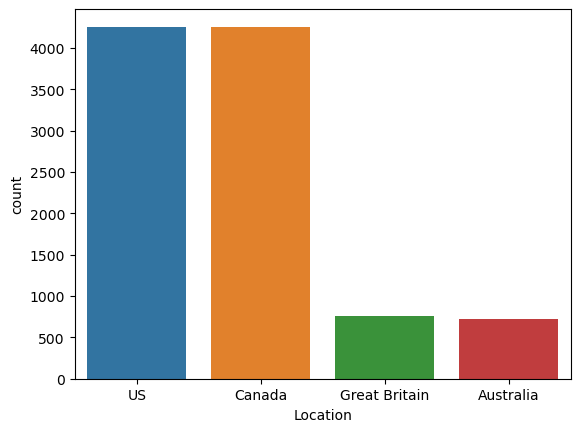

In [72]:
sns.countplot(x='Location', data=df)
plt.show()

#US and Canada have almost equal amount of customer who churned out

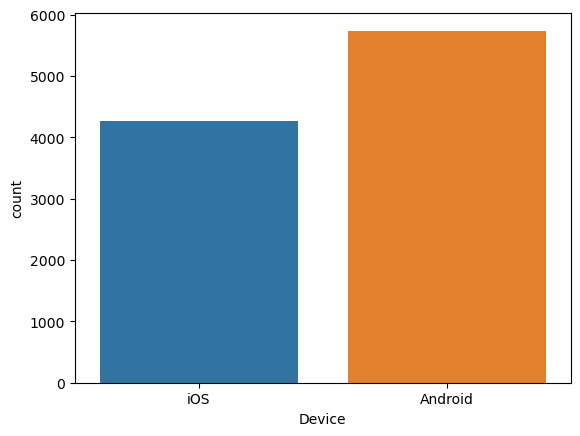

In [73]:
sns.countplot(x='Device', data=df)
plt.show()
#Android customers have bigger number than IOS customers

In [74]:
df.describe(include='all')

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
count,10000.00000,10000.00000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
unique,NaN,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Canada,Android,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,4258,5736,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4999.50000,5000.50000,42.698500,NaN,NaN,482.593336,64.657700,2.488800,476.297118,63.118000,...,473.630524,58.227900,2.487000,472.671126,56.968900,2.519500,478.629330,56.512600,2.496300,0.70000
std,2886.89568,2886.89568,12.495528,NaN,NaN,237.961476,29.329527,1.711306,237.491820,28.933247,...,235.090366,25.909251,1.721083,234.288930,25.615119,1.702266,233.135282,25.263995,1.713674,0.45828
min,0.00000,1.00000,20.000000,NaN,NaN,45.147050,12.000000,0.000000,46.283232,12.000000,...,45.784922,12.000000,0.000000,45.139863,12.000000,0.000000,45.093583,12.000000,0.000000,0.00000
25%,2499.75000,2500.75000,32.000000,NaN,NaN,275.978779,39.000000,1.000000,268.427326,38.000000,...,268.470286,36.000000,1.000000,269.432095,35.000000,1.000000,276.507055,35.000000,1.000000,0.00000
50%,4999.50000,5000.50000,43.000000,NaN,NaN,482.173250,65.000000,2.000000,474.442784,63.000000,...,472.391691,58.000000,2.000000,472.530676,57.000000,3.000000,481.872558,56.000000,3.000000,1.00000
75%,7499.25000,7500.25000,53.000000,NaN,NaN,688.898992,90.000000,4.000000,680.824377,88.000000,...,680.923305,80.000000,4.000000,673.599392,78.000000,4.000000,681.397961,77.000000,4.000000,1.00000


In [75]:
df.groupby('Location').count()
#Cana da and US have nearly same number of customer churned out

,Unnamed: 0,CustomerID,Age,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
Location,,,,,,,,,,,,,,,,,,,,,
Australia,725,725,725,725,725,725,725,725,725,725,...,725,725,725,725,725,725,725,725,725,725
Canada,4258,4258,4258,4258,4258,4258,4258,4258,4258,4258,...,4258,4258,4258,4258,4258,4258,4258,4258,4258,4258
Great Britain,762,762,762,762,762,762,762,762,762,762,...,762,762,762,762,762,762,762,762,762,762
US,4255,4255,4255,4255,4255,4255,4255,4255,4255,4255,...,4255,4255,4255,4255,4255,4255,4255,4255,4255,4255


In [76]:
df.columns

Index(['Unnamed: 0', 'CustomerID', 'Age', 'Location', 'Device',
       'Month_1_Spend', 'Month_1_Items', 'Month_1_Support_Calls',
       'Month_2_Spend', 'Month_2_Items', 'Month_2_Support_Calls',
       'Month_3_Spend', 'Month_3_Items', 'Month_3_Support_Calls',
       'Month_4_Spend', 'Month_4_Items', 'Month_4_Support_Calls',
       'Month_5_Spend', 'Month_5_Items', 'Month_5_Support_Calls',
       'Month_6_Spend', 'Month_6_Items', 'Month_6_Support_Calls',
       'Month_7_Spend', 'Month_7_Items', 'Month_7_Support_Calls',
       'Month_8_Spend', 'Month_8_Items', 'Month_8_Support_Calls',
       'Month_9_Spend', 'Month_9_Items', 'Month_9_Support_Calls',
       'Month_10_Spend', 'Month_10_Items', 'Month_10_Support_Calls',
       'Month_11_Spend', 'Month_11_Items', 'Month_11_Support_Calls',
       'Month_12_Spend', 'Month_12_Items', 'Month_12_Support_Calls', 'Churn'],
      dtype='object')

<Axes: xlabel='Month_3_Support_Calls', ylabel='Count'>

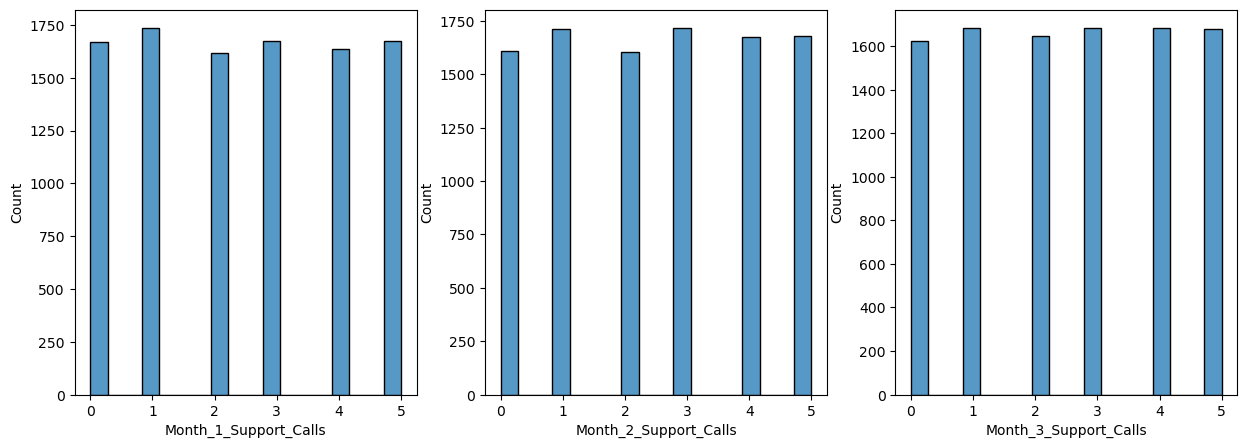

In [77]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_1_Support_Calls'], ax=ax1)
sns.histplot(df['Month_2_Support_Calls'], ax=ax2)
sns.histplot(df['Month_3_Support_Calls'], ax=ax3)

<Axes: xlabel='Month_6_Support_Calls', ylabel='Count'>

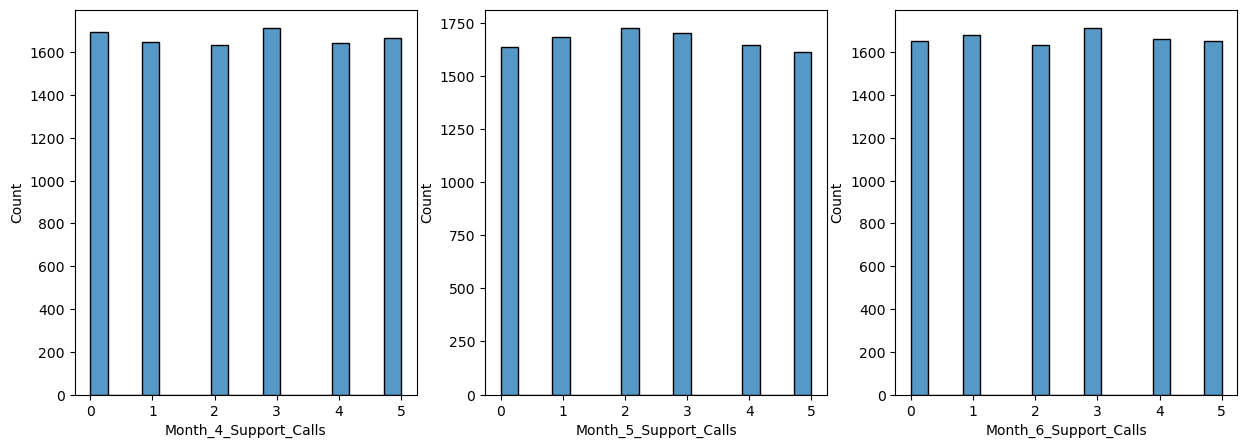

In [78]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_4_Support_Calls'], ax=ax1)
sns.histplot(df['Month_5_Support_Calls'], ax=ax2)
sns.histplot(df['Month_6_Support_Calls'], ax=ax3)

<Axes: xlabel='Month_9_Support_Calls', ylabel='Count'>

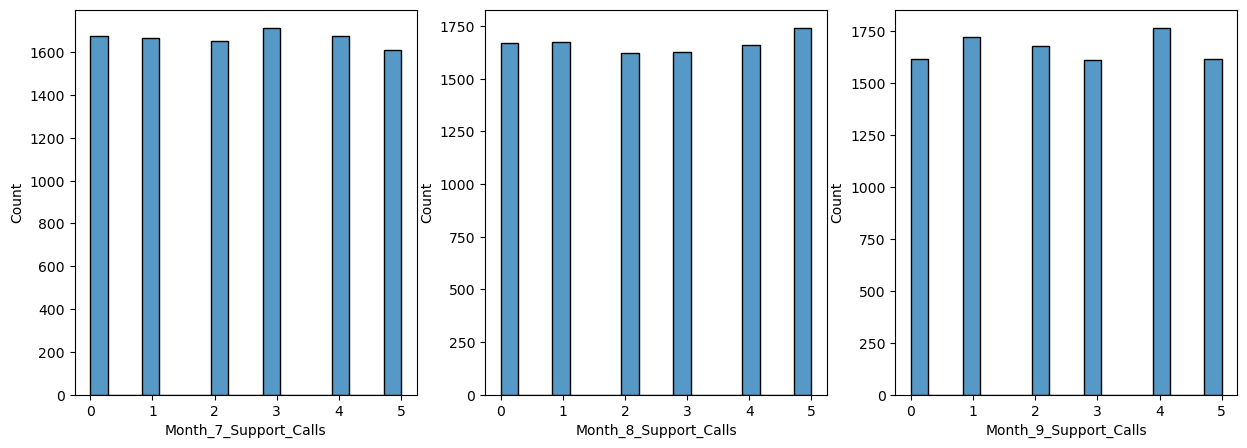

In [79]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_7_Support_Calls'], ax=ax1)
sns.histplot(df['Month_8_Support_Calls'], ax=ax2)
sns.histplot(df['Month_9_Support_Calls'], ax=ax3)

<Axes: xlabel='Month_12_Support_Calls', ylabel='Count'>

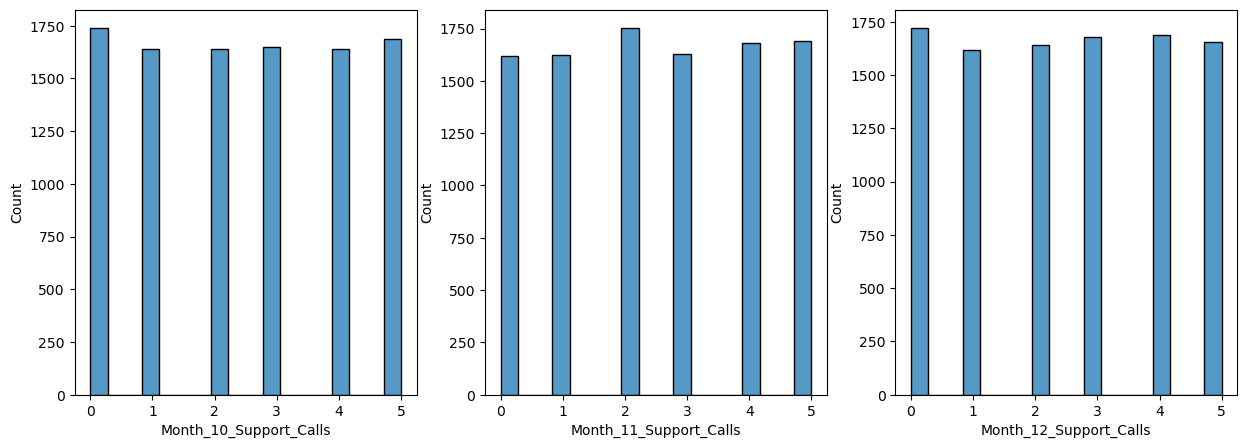

In [80]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_10_Support_Calls'], ax=ax1)
sns.histplot(df['Month_11_Support_Calls'], ax=ax2)
sns.histplot(df['Month_12_Support_Calls'], ax=ax3)

#customer tend to be more willing to make support call in month 10 which "0" reach the maximum which is near 1750, and then in Month 11 they back start to make call,
#but in month 12 they tend to not make support call again.

In [81]:
df.columns

Index(['Unnamed: 0', 'CustomerID', 'Age', 'Location', 'Device',
       'Month_1_Spend', 'Month_1_Items', 'Month_1_Support_Calls',
       'Month_2_Spend', 'Month_2_Items', 'Month_2_Support_Calls',
       'Month_3_Spend', 'Month_3_Items', 'Month_3_Support_Calls',
       'Month_4_Spend', 'Month_4_Items', 'Month_4_Support_Calls',
       'Month_5_Spend', 'Month_5_Items', 'Month_5_Support_Calls',
       'Month_6_Spend', 'Month_6_Items', 'Month_6_Support_Calls',
       'Month_7_Spend', 'Month_7_Items', 'Month_7_Support_Calls',
       'Month_8_Spend', 'Month_8_Items', 'Month_8_Support_Calls',
       'Month_9_Spend', 'Month_9_Items', 'Month_9_Support_Calls',
       'Month_10_Spend', 'Month_10_Items', 'Month_10_Support_Calls',
       'Month_11_Spend', 'Month_11_Items', 'Month_11_Support_Calls',
       'Month_12_Spend', 'Month_12_Items', 'Month_12_Support_Calls', 'Churn'],
      dtype='object')

<Axes: xlabel='Location', ylabel='Month_12_Spend'>

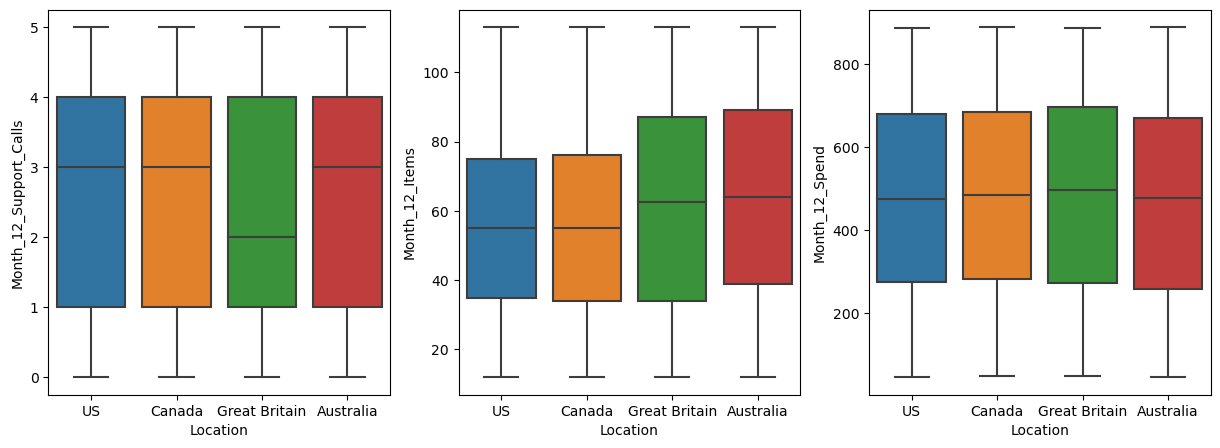

In [82]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='Location',y='Month_12_Support_Calls', data=df, ax=ax1)
sns.boxplot(x='Location',y='Month_12_Items',data=df, ax=ax2)
sns.boxplot(x='Location',y='Month_12_Spend', data=df, ax=ax3)

<Axes: xlabel='Location', ylabel='Month_11_Spend'>

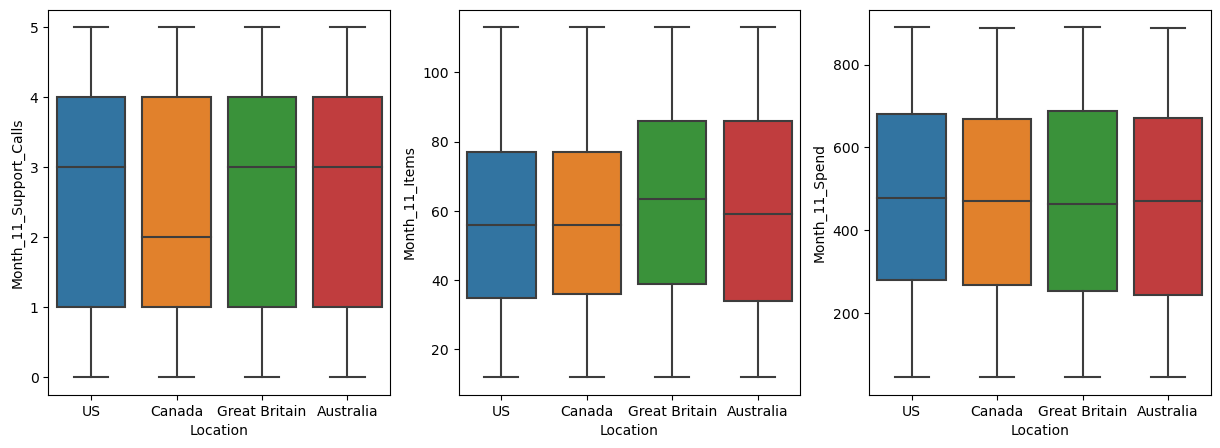

In [83]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='Location',y='Month_11_Support_Calls', data=df, ax=ax1)
sns.boxplot(x='Location',y='Month_11_Items',data=df, ax=ax2)
sns.boxplot(x='Location',y='Month_11_Spend', data=df, ax=ax3)

<Axes: xlabel='Location', ylabel='Month_10_Spend'>

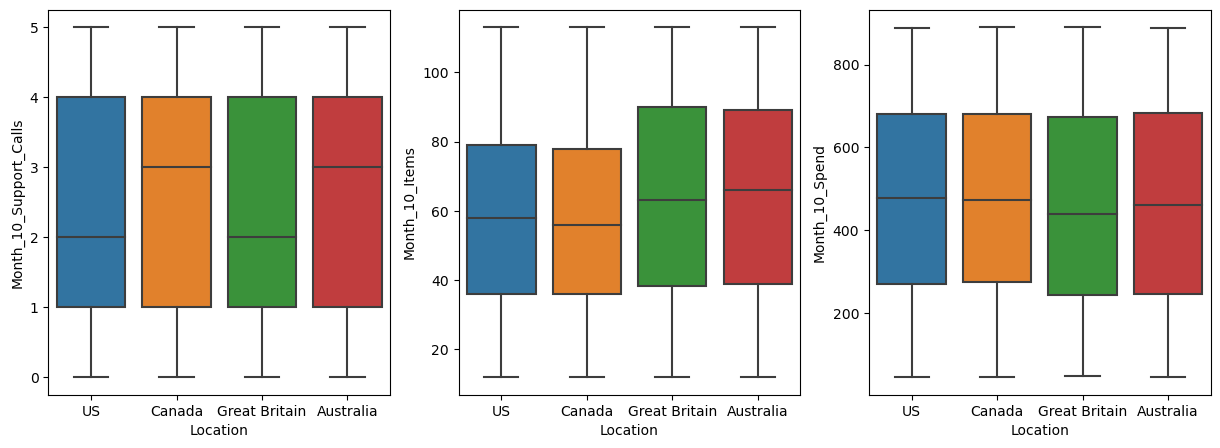

In [84]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='Location',y='Month_10_Support_Calls', data=df, ax=ax1)
sns.boxplot(x='Location',y='Month_10_Items',data=df, ax=ax2)
sns.boxplot(x='Location',y='Month_10_Spend', data=df, ax=ax3)

<Axes: xlabel='Device', ylabel='Month_10_Spend'>

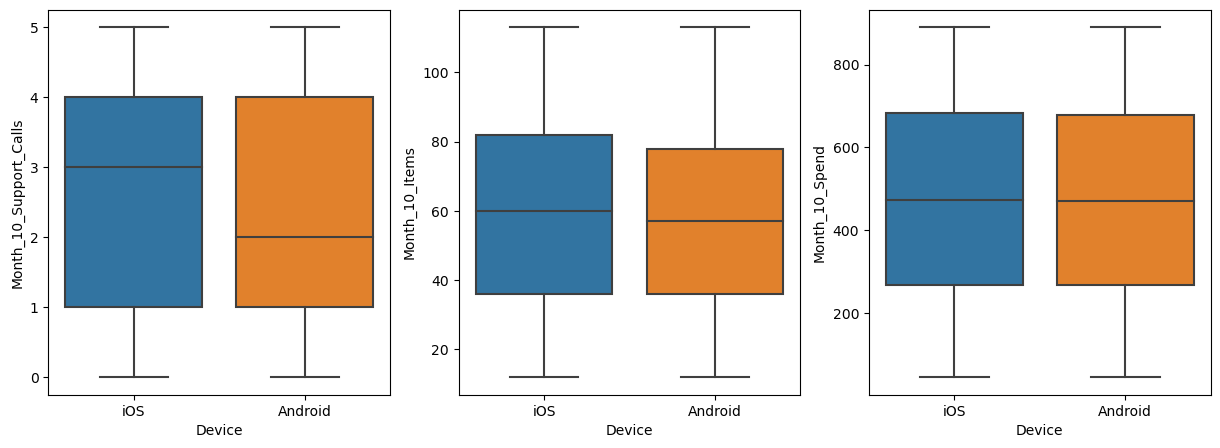

In [85]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='Device',y='Month_10_Support_Calls', data=df, ax=ax1)
sns.boxplot(x='Device',y='Month_10_Items',data=df, ax=ax2)
sns.boxplot(x='Device',y='Month_10_Spend', data=df, ax=ax3)

<Axes: xlabel='Device', ylabel='Month_11_Spend'>

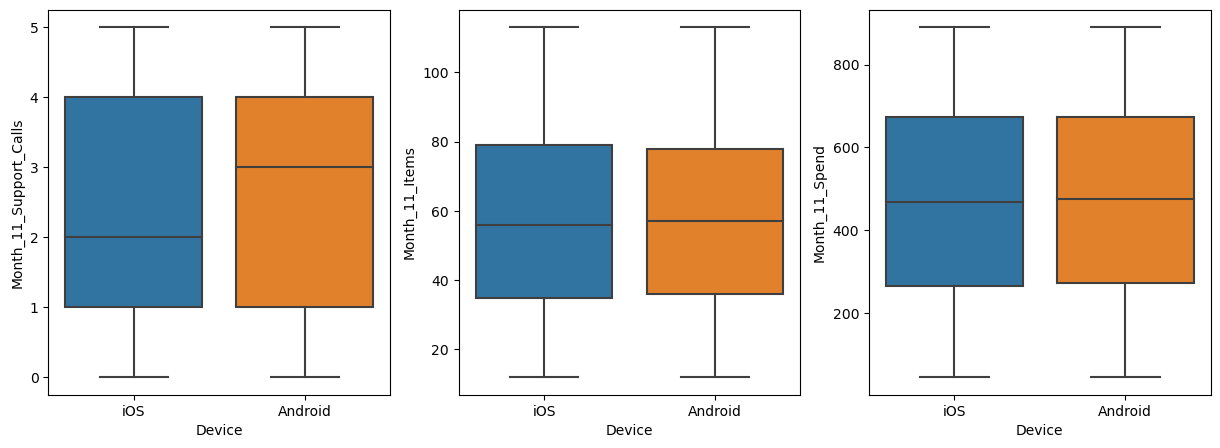

In [86]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='Device',y='Month_11_Support_Calls', data=df, ax=ax1)
sns.boxplot(x='Device',y='Month_11_Items',data=df, ax=ax2)
sns.boxplot(x='Device',y='Month_11_Spend', data=df, ax=ax3)

<Axes: xlabel='Device', ylabel='Month_12_Spend'>

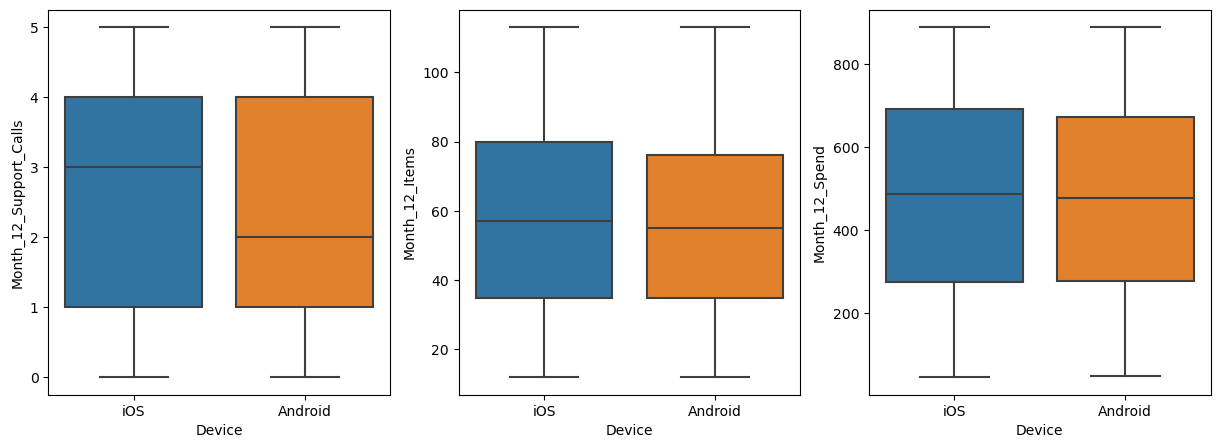

In [87]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='Device',y='Month_12_Support_Calls', data=df, ax=ax1)
sns.boxplot(x='Device',y='Month_12_Items',data=df, ax=ax2)
sns.boxplot(x='Device',y='Month_12_Spend', data=df, ax=ax3)

<Axes: xlabel='Month_3_Spend', ylabel='Count'>

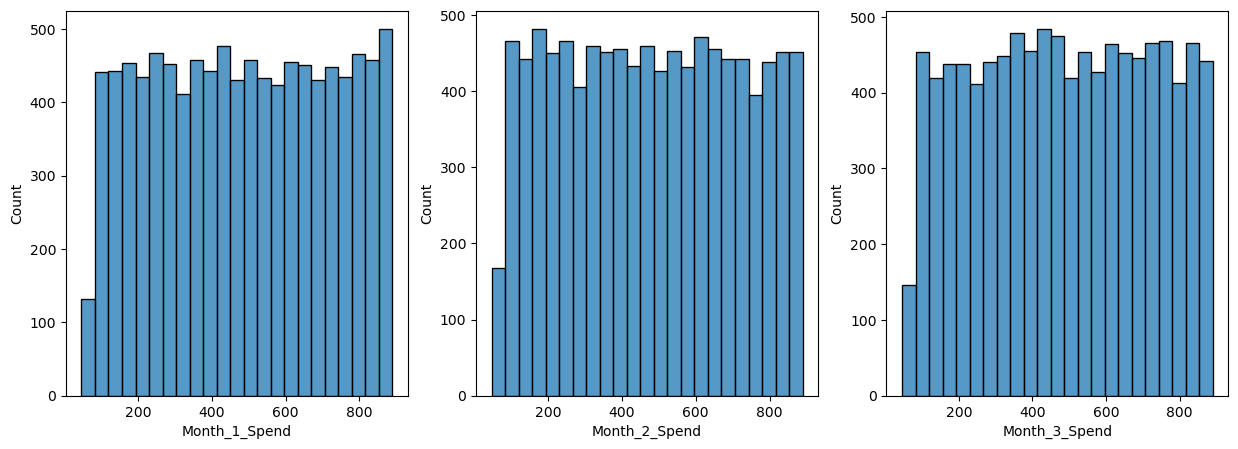

In [88]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_1_Spend'], ax=ax1)
sns.histplot(df['Month_2_Spend'], ax=ax2)
sns.histplot(df['Month_3_Spend'], ax=ax3)

<Axes: xlabel='Month_6_Spend', ylabel='Count'>

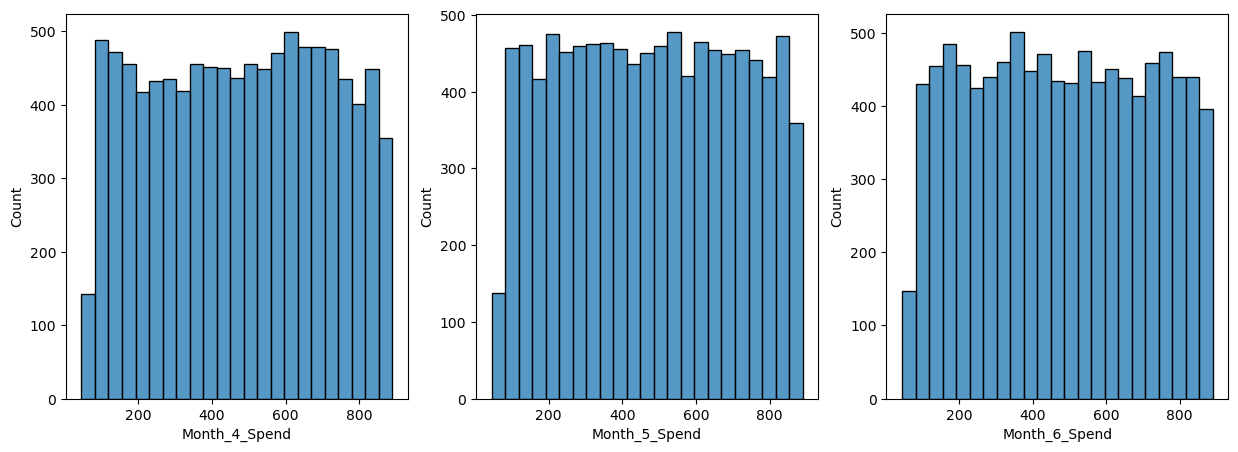

In [89]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_4_Spend'], ax=ax1)
sns.histplot(df['Month_5_Spend'], ax=ax2)
sns.histplot(df['Month_6_Spend'], ax=ax3)

<Axes: xlabel='Month_9_Spend', ylabel='Count'>

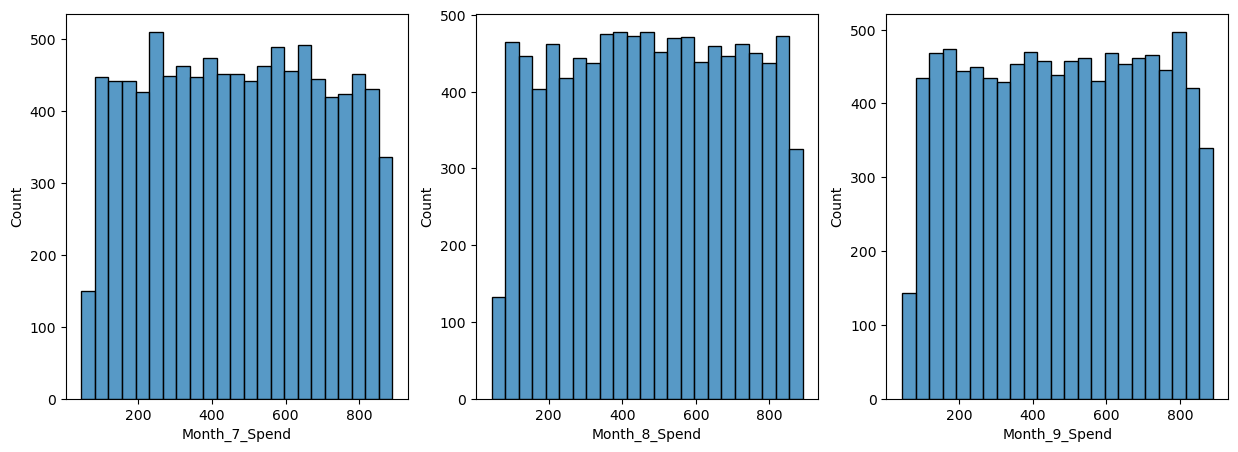

In [90]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_7_Spend'], ax=ax1)
sns.histplot(df['Month_8_Spend'], ax=ax2)
sns.histplot(df['Month_9_Spend'], ax=ax3)

<Axes: xlabel='Month_12_Spend', ylabel='Count'>

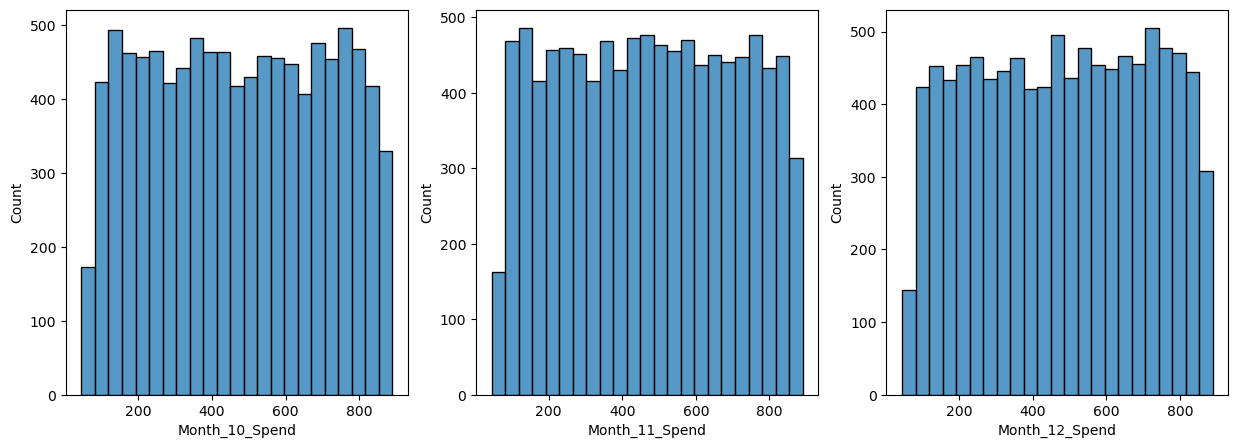

In [91]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_10_Spend'], ax=ax1)
sns.histplot(df['Month_11_Spend'], ax=ax2)
sns.histplot(df['Month_12_Spend'], ax=ax3)

<Axes: xlabel='Month_3_Items', ylabel='Count'>

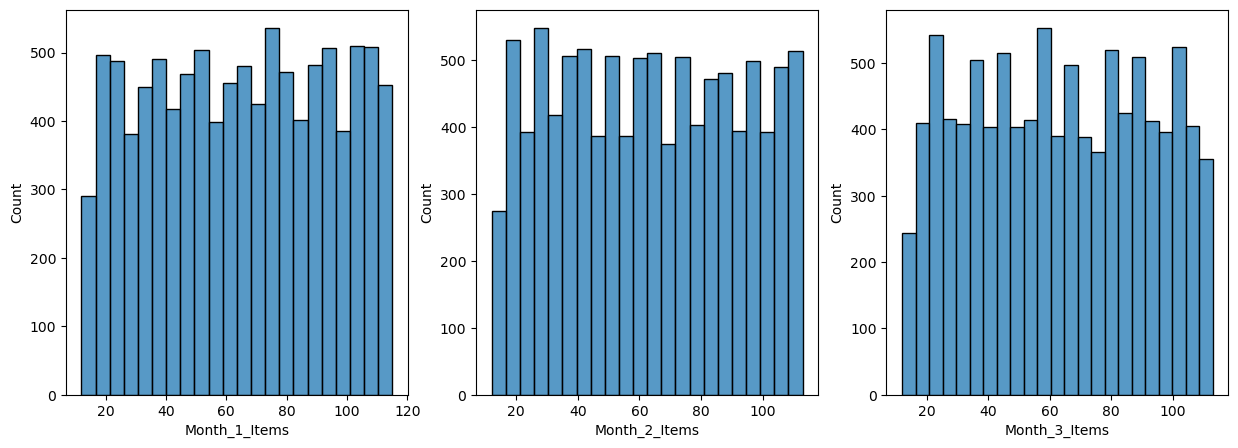

In [92]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_1_Items'], ax=ax1)
sns.histplot(df['Month_2_Items'], ax=ax2)
sns.histplot(df['Month_3_Items'], ax=ax3)

<Axes: xlabel='Month_6_Items', ylabel='Count'>

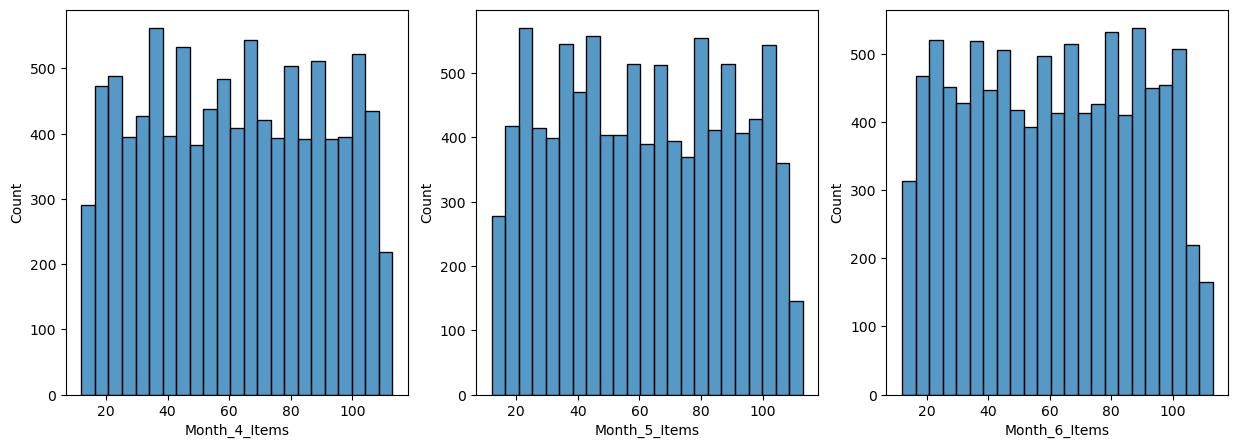

In [93]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_4_Items'], ax=ax1)
sns.histplot(df['Month_5_Items'], ax=ax2)
sns.histplot(df['Month_6_Items'], ax=ax3)

<Axes: xlabel='Month_9_Items', ylabel='Count'>

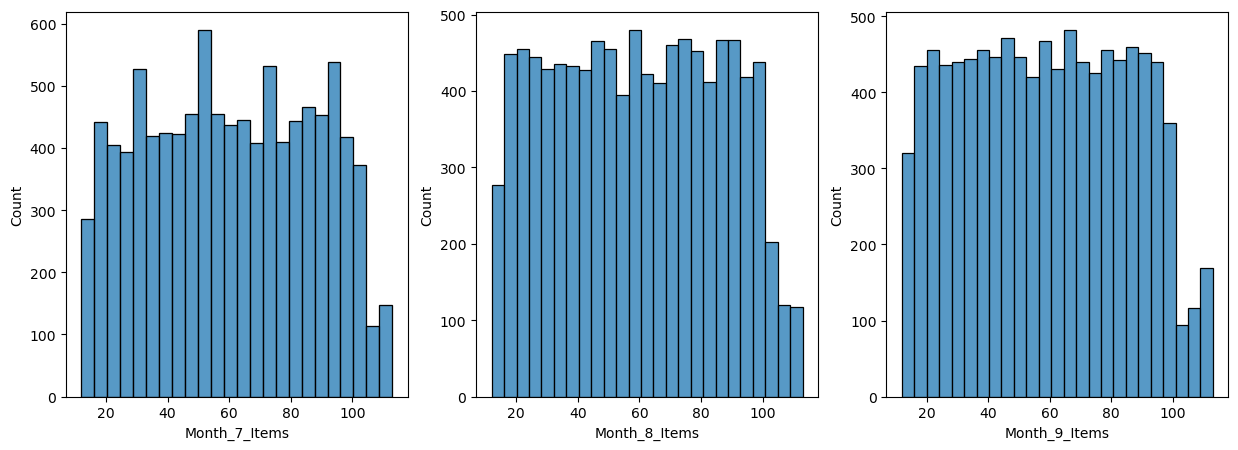

In [94]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_7_Items'], ax=ax1)
sns.histplot(df['Month_8_Items'], ax=ax2)
sns.histplot(df['Month_9_Items'], ax=ax3)

<Axes: xlabel='Month_12_Items', ylabel='Count'>

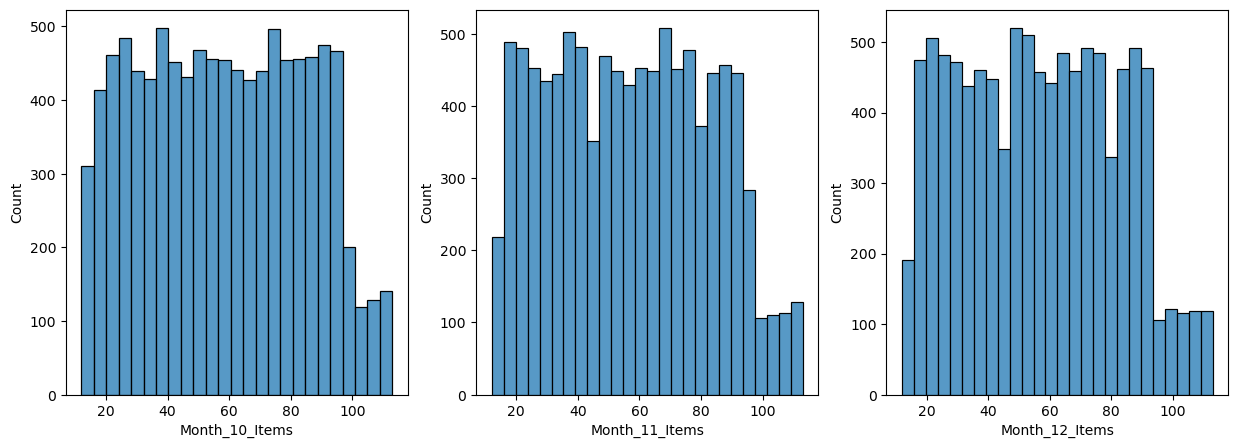

In [95]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_10_Items'], ax=ax1)
sns.histplot(df['Month_11_Items'], ax=ax2)
sns.histplot(df['Month_12_Items'], ax=ax3)

In [96]:
# Initial Hypothesis: Last month support call and region can be used to predict churned customers

In [97]:
df.columns

Index(['Unnamed: 0', 'CustomerID', 'Age', 'Location', 'Device',
       'Month_1_Spend', 'Month_1_Items', 'Month_1_Support_Calls',
       'Month_2_Spend', 'Month_2_Items', 'Month_2_Support_Calls',
       'Month_3_Spend', 'Month_3_Items', 'Month_3_Support_Calls',
       'Month_4_Spend', 'Month_4_Items', 'Month_4_Support_Calls',
       'Month_5_Spend', 'Month_5_Items', 'Month_5_Support_Calls',
       'Month_6_Spend', 'Month_6_Items', 'Month_6_Support_Calls',
       'Month_7_Spend', 'Month_7_Items', 'Month_7_Support_Calls',
       'Month_8_Spend', 'Month_8_Items', 'Month_8_Support_Calls',
       'Month_9_Spend', 'Month_9_Items', 'Month_9_Support_Calls',
       'Month_10_Spend', 'Month_10_Items', 'Month_10_Support_Calls',
       'Month_11_Spend', 'Month_11_Items', 'Month_11_Support_Calls',
       'Month_12_Spend', 'Month_12_Items', 'Month_12_Support_Calls', 'Churn'],
      dtype='object')

In [98]:
df.groupby(['Month_12_Support_Calls','Location'])['CustomerID'].count().unstack()

Location,Australia,Canada,Great Britain,US
Month_12_Support_Calls,,,,
0,123,712,137,749
1,121,700,131,663
2,110,701,118,713
3,111,739,118,712
4,148,698,117,723
5,112,708,141,695


In [99]:
df.groupby(['Device','Location'])['CustomerID'].count().unstack()

Location,Australia,Canada,Great Britain,US
Device,,,,
Android,216,2693,233,2594
iOS,509,1565,529,1661


In [100]:
df.groupby(['Month_11_Support_Calls','Location'])['CustomerID'].count().unstack()

Location,Australia,Canada,Great Britain,US
Month_11_Support_Calls,,,,
0,107,685,119,710
1,114,718,128,665
2,134,755,128,736
3,116,677,117,720
4,142,709,145,685
5,112,714,125,739


In [101]:
df.groupby(['Month_10_Support_Calls','Location'])['CustomerID'].count().unstack()

Location,Australia,Canada,Great Britain,US
Month_10_Support_Calls,,,,
0,122,748,129,741
1,111,714,137,679
2,122,652,136,731
3,123,706,125,697
4,116,709,122,694
5,131,729,113,713


In [102]:
#We need to categorize the age to see if there is some relationship 
def recategorization(x):
    if x >= 20 and x < 35:
        return '20-35'
    elif x >= 35 and x<50:
        return '35-50'
    elif x >= 50:
        return '50+'


In [103]:
df['Age'] = df['Age'].apply(recategorization)

In [104]:
df

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
0,0,1,35-50,US,iOS,756.005761,39,2,582.023075,92,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
1,1,2,50+,US,iOS,594.838157,59,0,251.269898,33,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
2,2,3,35-50,Canada,Android,453.217405,21,3,124.178946,92,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
3,3,4,35-50,US,iOS,621.453170,95,1,134.362559,46,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
4,4,5,35-50,US,iOS,660.735119,48,5,713.265527,54,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,35-50,Great Britain,iOS,496.165324,84,1,735.148231,60,...,708.936256,77,4,672.755957,23,5,710.675753,60,4,0
9996,9996,9997,50+,Great Britain,iOS,138.836616,76,3,673.599667,52,...,736.393247,57,4,379.113761,75,4,870.230372,15,3,0
9997,9997,9998,35-50,US,iOS,533.289217,106,4,367.139990,41,...,567.421148,50,3,633.113010,89,5,624.403650,35,4,0
9998,9998,9999,50+,Australia,iOS,684.746137,70,0,751.149320,105,...,239.675846,32,5,103.703552,97,5,731.775049,28,4,0


In [105]:
df.groupby(['Month_11_Support_Calls','Age'])['CustomerID'].count().unstack()

Age,20-35,35-50,50+
Month_11_Support_Calls,,,
0,518,570,533
1,479,583,563
2,543,597,613
3,515,579,536
4,515,610,556
5,526,572,592


In [106]:
df.groupby(['Month_12_Support_Calls','Age'])['CustomerID'].count().unstack()

Age,20-35,35-50,50+
Month_12_Support_Calls,,,
0,510,608,603
1,517,543,555
2,508,596,538
3,543,574,563
4,513,573,600
5,505,617,534


In [107]:
df.groupby(['Month_10_Support_Calls','Age'])['CustomerID'].count().unstack()

Age,20-35,35-50,50+
Month_10_Support_Calls,,,
0,553,582,605
1,499,588,554
2,474,580,587
3,530,584,537
4,504,582,555
5,536,595,555


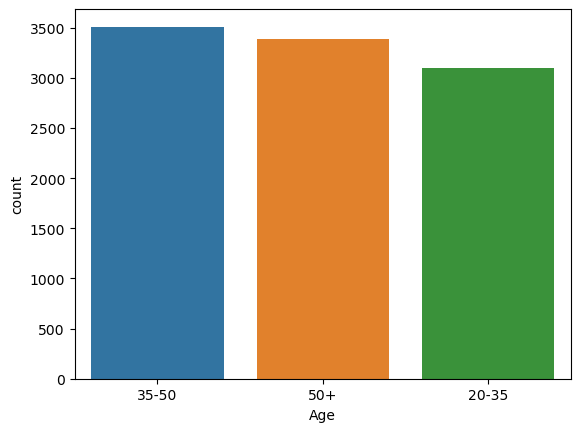

In [108]:
sns.countplot(x='Age', data=df)
plt.show()
#age 35-50 group have more customers chruned out

In [109]:
df.groupby(['Device','Age'])['CustomerID'].count().unstack()

Age,20-35,35-50,50+
Device,,,
Android,1882,2002,1852
iOS,1214,1509,1541


In [110]:
df.groupby(['Device','Location'])['CustomerID'].count().unstack()
#In Canada and US, most customer churned out are Android users, but in Australia and Great Britain, more IOS users tend to churn out. 

Location,Australia,Canada,Great Britain,US
Device,,,,
Android,216,2693,233,2594
iOS,509,1565,529,1661


In [111]:
df.groupby(['Location','Age'])['CustomerID'].count().unstack()
#In Australia and Great Britain, people who ages 50+ are more likely to churn out, 
# but in Canada and US, people who aged 35-50 are more likely to churn out.

Age,20-35,35-50,50+
Location,,,
Australia,165,276,284
Canada,1371,1486,1401
Great Britain,165,279,318
US,1395,1470,1390


In [112]:
#We will stick to device

In [113]:
df

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
0,0,1,35-50,US,iOS,756.005761,39,2,582.023075,92,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
1,1,2,50+,US,iOS,594.838157,59,0,251.269898,33,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
2,2,3,35-50,Canada,Android,453.217405,21,3,124.178946,92,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
3,3,4,35-50,US,iOS,621.453170,95,1,134.362559,46,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
4,4,5,35-50,US,iOS,660.735119,48,5,713.265527,54,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,35-50,Great Britain,iOS,496.165324,84,1,735.148231,60,...,708.936256,77,4,672.755957,23,5,710.675753,60,4,0
9996,9996,9997,50+,Great Britain,iOS,138.836616,76,3,673.599667,52,...,736.393247,57,4,379.113761,75,4,870.230372,15,3,0
9997,9997,9998,35-50,US,iOS,533.289217,106,4,367.139990,41,...,567.421148,50,3,633.113010,89,5,624.403650,35,4,0
9998,9998,9999,50+,Australia,iOS,684.746137,70,0,751.149320,105,...,239.675846,32,5,103.703552,97,5,731.775049,28,4,0


In [61]:
hot = pd.get_dummies(df[['Age','Location','Device']])
df = pd.concat([df, hot], axis = 1)

In [114]:
df_new= df.drop(['Unnamed: 0', 'CustomerID','Churn','Location','Age'], axis=1)

In [115]:
df_new

,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,Month_3_Items,Month_3_Support_Calls,...,Month_9_Support_Calls,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls
0,iOS,756.005761,39,2,582.023075,92,2,212.323540,96,4,...,5,280.397827,60,0,700.181510,66,3,382.719682,59,0
1,iOS,594.838157,59,0,251.269898,33,2,186.909752,63,4,...,1,863.000645,89,1,571.331352,28,3,570.203975,89,0
2,Android,453.217405,21,3,124.178946,92,0,316.492407,40,5,...,2,858.545990,60,5,198.222684,38,1,187.475764,79,5
3,iOS,621.453170,95,1,134.362559,46,5,162.945529,65,2,...,0,404.590146,59,3,565.395592,78,1,281.415092,63,4
4,iOS,660.735119,48,5,713.265527,54,2,736.904463,69,1,...,0,178.143438,85,1,574.382094,34,2,544.981985,28,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,iOS,496.165324,84,1,735.148231,60,2,656.082890,105,1,...,2,708.936256,77,4,672.755957,23,5,710.675753,60,4
9996,iOS,138.836616,76,3,673.599667,52,4,665.929803,61,4,...,1,736.393247,57,4,379.113761,75,4,870.230372,15,3
9997,iOS,533.289217,106,4,367.139990,41,1,249.490470,112,0,...,0,567.421148,50,3,633.113010,89,5,624.403650,35,4
9998,iOS,684.746137,70,0,751.149320,105,4,860.697594,109,1,...,4,239.675846,32,5,103.703552,97,5,731.775049,28,4


In [118]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in ['Device']:
    le = LabelEncoder()
    df_new[column] = le.fit_transform(df_new[column])
    label_encoders[column] = le

In [119]:
df_new

,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,Month_3_Items,Month_3_Support_Calls,...,Month_9_Support_Calls,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls
0,1,756.005761,39,2,582.023075,92,2,212.323540,96,4,...,5,280.397827,60,0,700.181510,66,3,382.719682,59,0
1,1,594.838157,59,0,251.269898,33,2,186.909752,63,4,...,1,863.000645,89,1,571.331352,28,3,570.203975,89,0
2,0,453.217405,21,3,124.178946,92,0,316.492407,40,5,...,2,858.545990,60,5,198.222684,38,1,187.475764,79,5
3,1,621.453170,95,1,134.362559,46,5,162.945529,65,2,...,0,404.590146,59,3,565.395592,78,1,281.415092,63,4
4,1,660.735119,48,5,713.265527,54,2,736.904463,69,1,...,0,178.143438,85,1,574.382094,34,2,544.981985,28,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,496.165324,84,1,735.148231,60,2,656.082890,105,1,...,2,708.936256,77,4,672.755957,23,5,710.675753,60,4
9996,1,138.836616,76,3,673.599667,52,4,665.929803,61,4,...,1,736.393247,57,4,379.113761,75,4,870.230372,15,3
9997,1,533.289217,106,4,367.139990,41,1,249.490470,112,0,...,0,567.421148,50,3,633.113010,89,5,624.403650,35,4
9998,1,684.746137,70,0,751.149320,105,4,860.697594,109,1,...,4,239.675846,32,5,103.703552,97,5,731.775049,28,4


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline

In [124]:
X = df_new.drop(['Device'], axis=1)
y = df_new['Device']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [128]:
log = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC()

In [129]:
log.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

/Users/luwei/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [130]:
pred_l = log.predict(X_test)
pred_nb = nb.predict(X_test)
pred_knn = knn.predict(X_test)
pred_svc = svc.predict(X_test)

In [131]:
print(f1_score(pred_l, y_test))
print(f1_score(pred_nb, y_test))
print(f1_score(pred_knn, y_test))
print(f1_score(pred_svc, y_test))

0.18028169014084505
0.3297252289758535
0.35623749166110735
0.0


In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [133]:
dt = DecisionTreeClassifier(random_state=123)
dt = dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)

In [134]:
print(f1_score(pred_dt, y_test))

0.47414294015107494


In [136]:
# Hyperparameter tuning
# select parameters

params_knn = {'n_neighbors': list(range(1,200)), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

# Define the models

knn = KNeighborsClassifier()

# Define GridSearchCV
gridsearch_knn = GridSearchCV(knn, params_knn, cv=10, scoring='recall')
    #nb, params_nb, cv=5)
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, n_iter = 50, scoring='recall')

# Fit models
gridsearch_knn.fit(X_train, y_train)
randomsearch_knn.fit(X_train, y_train)

# Get the best parameters
print("Best parameters for KNN - gridsearch: ", gridsearch_knn.best_params_)
print("Best parameters for KNN - randomsearch: ", randomsearch_knn.best_params_)

Best parameters for KNN - gridsearch:  {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Best parameters for KNN - randomsearch:  {'weights': 'distance', 'n_neighbors': 9, 'metric': 'euclidean'}


In [137]:
# Apply the best parameters

knn_best = KNeighborsClassifier(**gridsearch_knn.best_params_)

# Perform cross-validation

cv_scores_knn = cross_val_score(knn_best, X_train, y_train, cv=10, scoring='precision')

#print("Cross-validation scores for Naive Bayes: ", cv_scores_nb)
print("Cross-validation scores for KNN: ", cv_scores_knn)

# Fit the models with the best parameters

knn_best.fit(X_train, y_train)

# Evaluate on the test set

y_pred_knn = knn_best.predict(X_test)

#print("Test accuracy for Naive Bayes: ", accuracy_score(y_test, y_pred_nb))
print("Test accuracy for KNN: ", accuracy_score(y_test, y_pred_knn))

Cross-validation scores for KNN:  [0.41964286 0.43806647 0.40849673 0.4358209  0.4100295  0.38853503
 0.39252336 0.43809524 0.43333333 0.43653251]
Test accuracy for KNN:  0.499


In [138]:
print("\nK-Nearest Neighbors Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_knn))
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Precision: ", precision_score(y_test, y_pred_knn))
print("Recall: ", recall_score(y_test, y_pred_knn))
print("F1 Score: ", f1_score(y_test, y_pred_knn))


K-Nearest Neighbors Metrics: 
Confusion Matrix:  [[669 451]
 [551 329]]
Accuracy:  0.499
Precision:  0.4217948717948718
Recall:  0.37386363636363634
F1 Score:  0.39638554216867466


In [139]:
print("Decision Tree Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, pred_dt))
print("Accuracy: ", accuracy_score(y_test, pred_dt))
print("Precision: ", precision_score(y_test, pred_dt))
print("Recall: ", recall_score(y_test, pred_dt))
print("F1 Score: ", f1_score(y_test, pred_dt))

Decision Tree Metrics: 
Confusion Matrix:  [[687 433]
 [472 408]]
Accuracy:  0.5475
Precision:  0.48513674197384066
Recall:  0.4636363636363636
F1 Score:  0.47414294015107494


In [140]:
df_new

,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,Month_3_Items,Month_3_Support_Calls,...,Month_9_Support_Calls,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls
0,1,756.005761,39,2,582.023075,92,2,212.323540,96,4,...,5,280.397827,60,0,700.181510,66,3,382.719682,59,0
1,1,594.838157,59,0,251.269898,33,2,186.909752,63,4,...,1,863.000645,89,1,571.331352,28,3,570.203975,89,0
2,0,453.217405,21,3,124.178946,92,0,316.492407,40,5,...,2,858.545990,60,5,198.222684,38,1,187.475764,79,5
3,1,621.453170,95,1,134.362559,46,5,162.945529,65,2,...,0,404.590146,59,3,565.395592,78,1,281.415092,63,4
4,1,660.735119,48,5,713.265527,54,2,736.904463,69,1,...,0,178.143438,85,1,574.382094,34,2,544.981985,28,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,496.165324,84,1,735.148231,60,2,656.082890,105,1,...,2,708.936256,77,4,672.755957,23,5,710.675753,60,4
9996,1,138.836616,76,3,673.599667,52,4,665.929803,61,4,...,1,736.393247,57,4,379.113761,75,4,870.230372,15,3
9997,1,533.289217,106,4,367.139990,41,1,249.490470,112,0,...,0,567.421148,50,3,633.113010,89,5,624.403650,35,4
9998,1,684.746137,70,0,751.149320,105,4,860.697594,109,1,...,4,239.675846,32,5,103.703552,97,5,731.775049,28,4


In [141]:
#Choose dicision tree model and optimize the model
X = df_new.drop(['Device','Month_1_Spend','Month_1_Items','Month_1_Support_Calls'], axis=1)
y = df_new['Device']


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [143]:
dt = DecisionTreeClassifier(random_state=123)
dt = dt.fit(X_train, y_train)
pred_dt_new = dt.predict(X_test)

In [144]:
print("Decision Tree Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, pred_dt_new))
print("Accuracy: ", accuracy_score(y_test, pred_dt_new))
print("Precision: ", precision_score(y_test, pred_dt_new))
print("Recall: ", recall_score(y_test, pred_dt_new))
print("F1 Score: ", f1_score(y_test, pred_dt_new))

Decision Tree Metrics: 
Confusion Matrix:  [[682 438]
 [440 440]]
Accuracy:  0.561
Precision:  0.5011389521640092
Recall:  0.5
F1 Score:  0.5005688282138795


In [145]:
X = df_new.drop(['Device','Month_1_Spend','Month_1_Items','Month_1_Support_Calls', 'Month_2_Spend','Month_2_Items','Month_2_Support_Calls'], axis=1)
y = df_new['Device']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [147]:
dt = DecisionTreeClassifier(random_state=123)
dt = dt.fit(X_train, y_train)
pred_dt_new1 = dt.predict(X_test)

In [148]:
print("Decision Tree Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, pred_dt_new1))
print("Accuracy: ", accuracy_score(y_test, pred_dt_new1))
print("Precision: ", precision_score(y_test, pred_dt_new1))
print("Recall: ", recall_score(y_test, pred_dt_new1))
print("F1 Score: ", f1_score(y_test, pred_dt_new1))

Decision Tree Metrics: 
Confusion Matrix:  [[683 437]
 [435 445]]
Accuracy:  0.564
Precision:  0.5045351473922902
Recall:  0.5056818181818182
F1 Score:  0.5051078320090806


My initial hypothesis is that the last three month's support call and region can be used to predict churned customers. My idea is correct but not sufficient for this analysis. During my analysis, I found that US and Canada have almost equal numbers of customers who churned out, and both countries are more remarkable than Great Britain and Australia. Besides, Android customers have a more significant portion than IOS customers. Specifically, in Canada and US, most customers churned out are Android users, but in Australia and Great Britain, more IOS users tend to churn out.
Additionally, among those customers, customers tend to be more willing to make support calls in 10, which "o" reach the maximum and near 1750, and then in month 11, they back to make support calls. In month 12, they tend not to make support calls again, followed by they will not continue their subscription. I choose three months as my hypothesis because three months can easily create realistic recommendations and put that into action.

I used a box plot to analyze whether support call numbers, purchasing items, and monthly spending depended on different regions for the last three months. The results reflect that only support calls vary among other areas, Australia remains on three for each month, and Australia has the least number of people who cancel subscriptions. 

I also check if age can influence customers. So that I categorize age into three ranges "35-50", "20-35" and "50+". And I got the result that in Australia and Great Britain, people aged 50+ are more likely to churn out, but in Canada and US, people aged 35-50 are more likely to churn out.


I stick to device types to build models because the device reflects the most obvious difference. 
For the feature engineering part, I create dummy variables for the "Age," "Location," and "Device" columns and allow the model to process the data. Then I drop data that may be not helpful or meaningful such as 'Unnamed: 0', 'Customer ID,' 'Churn,' 'Location,' and 'Age.' I need to keep the device for modeling to encode the "Device" column to change the string format into a number. 

For the model development part, I create the baseline by dividing 20% data into testing and 80% into training data. I use Logistic Regression, Naive Bayes, K-Nearest Neighbors Algorithm, SVC, and Decision tree to make predictions. I fit in model training data and ask models to make predictions based on X-testing data. Then I compared F1_score, and the decision tree model got the highest score which is 0.474143. I put hyperparameter tuning onto the KNN model to find and apply the best parameters, but the final F1 score is 0.39639, which is still lower than the decision tree. I am working on the decision tree model to improve performance by adjusting features. I deleted month one and month 2 data and got the 0.50511 F1 score, which can be a 0.03 increase. 

For model evaluation, we have 0.564 for accuracy (56.4% correctly classified data points out of the total number of data points), 0.5045 for precision (50.45% true positive predictions of all positive predictions), 0.50568 for recall (50.568% true positive predictions of the total number of actual positive samples) and 0.5051 for F1 score. This is a decent model based on evaluation matrices. The number is not high enough, but there is no obvious over-fitting. 